In [1]:
#Загружаем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('seaborn-v0_8')
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats
import random

In [2]:
# Загружаем датасет
df= pd.read_csv("insurance.csv")

In [3]:
#Обзор датасета

In [4]:
#Проверяем датасет
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#Имеются колонки:
#age - Возраст
#sex - Пол
#bmi-Индекс массы тела (ИМТ)
#children - Количество детей
#smoke - Отношение к курению
#region - Регион
#charges - Медицинские затраты

In [6]:
#Выдвигаемые вопросы
#-существует ли статистическая свазь между затратами на мед.помощ и полом,возрастом,ИМТ,кол-вом детей, курением, регионом?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
#В датасете 7 колонок и 1338 строк
#Нет пропущенных значений
#Все значения находятся в правильном формате, поэтому не нуждаются в дополнительной очистке перед анализом

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
#В датасет попали только взрослые люди от 18 до 64 лет. 
#Средний возраст близок к медианному что говорит о равномерном распределении возраста
#ИМТ так же, распределен равномерно
#Количество детей от 0 до 5
#Среднее число затрат на медицинские расходы выше медианного. 
#Максимальное число гораздо больше чем третий квантиль(75%) что говорит о наличии выбросов больших значений. 
#Распределение затрат не равноменое.

In [11]:
#Анализ с одной переменной

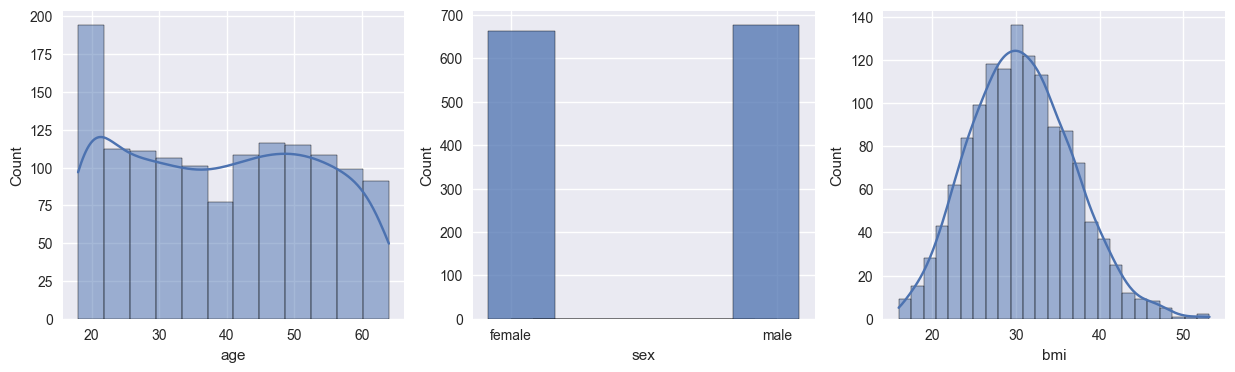

In [215]:
fig,ax =plt.subplots(1,3,figsize=(15, 4))
sns.histplot(df['age'], edgecolor='k', ax=ax[0],kde= True)
sns.histplot(data=df ,x='sex', edgecolor='k', discrete=False, shrink=3, ax=ax[1] )
sns.histplot(data=df ,x='bmi', edgecolor='k',ax=ax[2],kde= True)
plt.show()

In [110]:
#Возраст распределен не равномерно
#Средняя мода на 18 годах
#в датасете примерно одинаковое количество мужчин и женщин
#индекс массы тема соответствует нормальному распределению, со среднем примерно в 30.

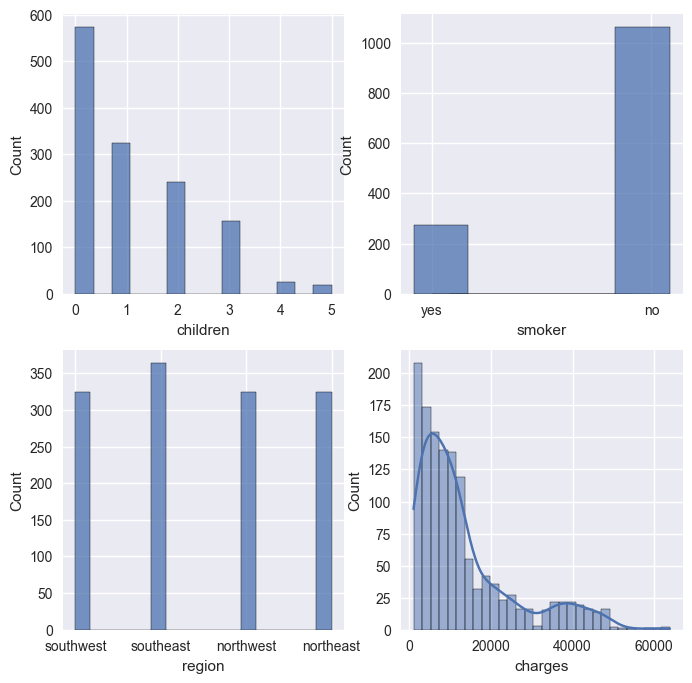

In [130]:
fig,ax =plt.subplots(2,2,figsize=(8, 8))
sns.histplot(df['children'], ax=ax[0,0])
sns.histplot(df['smoker'], discrete= False, shrink=3, ax=ax[0,1] )
sns.histplot(df['region'], discrete= False ,ax=ax[1,0])
sns.histplot(df['charges'],ax=ax[1,1],kde= True)
plt.show()

In [216]:
#В дс. люди имеющие до 5 детей распределены по убывающей
#Не курящих людей в дс. больше чем курящих
#В дс. приверно одинаковое количество людей из каждого региона
#В основном расходы на мед момощ варьируются от 0 до 1500, но так же довольно много людей тратящих больше 1500.

In [127]:
#Анализ и двумя и более переменными

In [27]:
#Сделаем простой корреляционный анализ между всеми переменнымы

In [28]:
#Для этого создадим копию нашего дата сета в новый, где все категориальные параметры такие как пол,курение и регион будут представленны в числовом виде
df_encode=df.copy()

In [139]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(df_encode.sex.drop_duplicates()) 
df_encode.sex = le.transform(df_encode.sex)
# smoker or not
le.fit(df_encode.smoker.drop_duplicates()) 
df_encode.smoker = le.transform(df_encode.smoker)
#region
le.fit(df_encode.region.drop_duplicates()) 
df_encode.region = le.transform(df_encode.region)

In [140]:
df_encode.head()

,age,sex,bmi,children,smoker,region,charges,bmi_30
0,19,0,27.900,0,1,3,16884.92400,<30
1,18,1,33.770,1,0,2,1725.55230,>30
2,28,1,33.000,3,0,2,4449.46200,>30
3,33,1,22.705,0,0,1,21984.47061,<30
4,32,1,28.880,0,0,1,3866.85520,<30


In [31]:
#Далее узнаем коэфициент корреляции для каждого параметра относительно медицинских трат

In [141]:
df_encode.corr()['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

In [142]:
#Наибольшая взвимосвязь между переменными обнаруживается в отнашении к курению, так же возраста и ИМТ.
#Количество детей, пол, и регион не связаны с мед. тратами.

In [143]:
#Проиллюстрируем полученые данные более наглядно

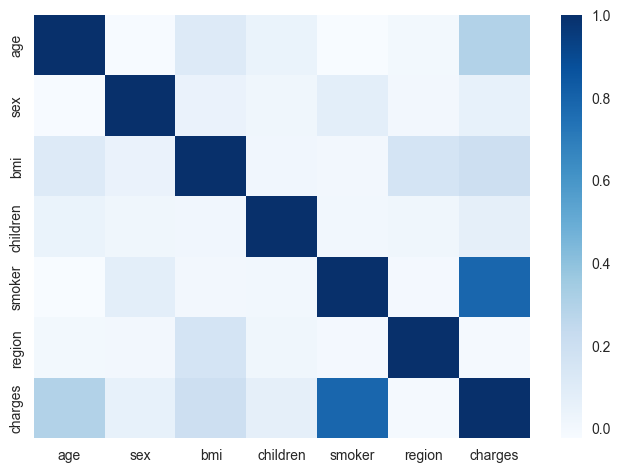

In [147]:
corr = df_encode.corr()
sns.heatmap(corr, cmap="Blues")
plt.show()

<Figure size 1000x800 with 0 Axes>

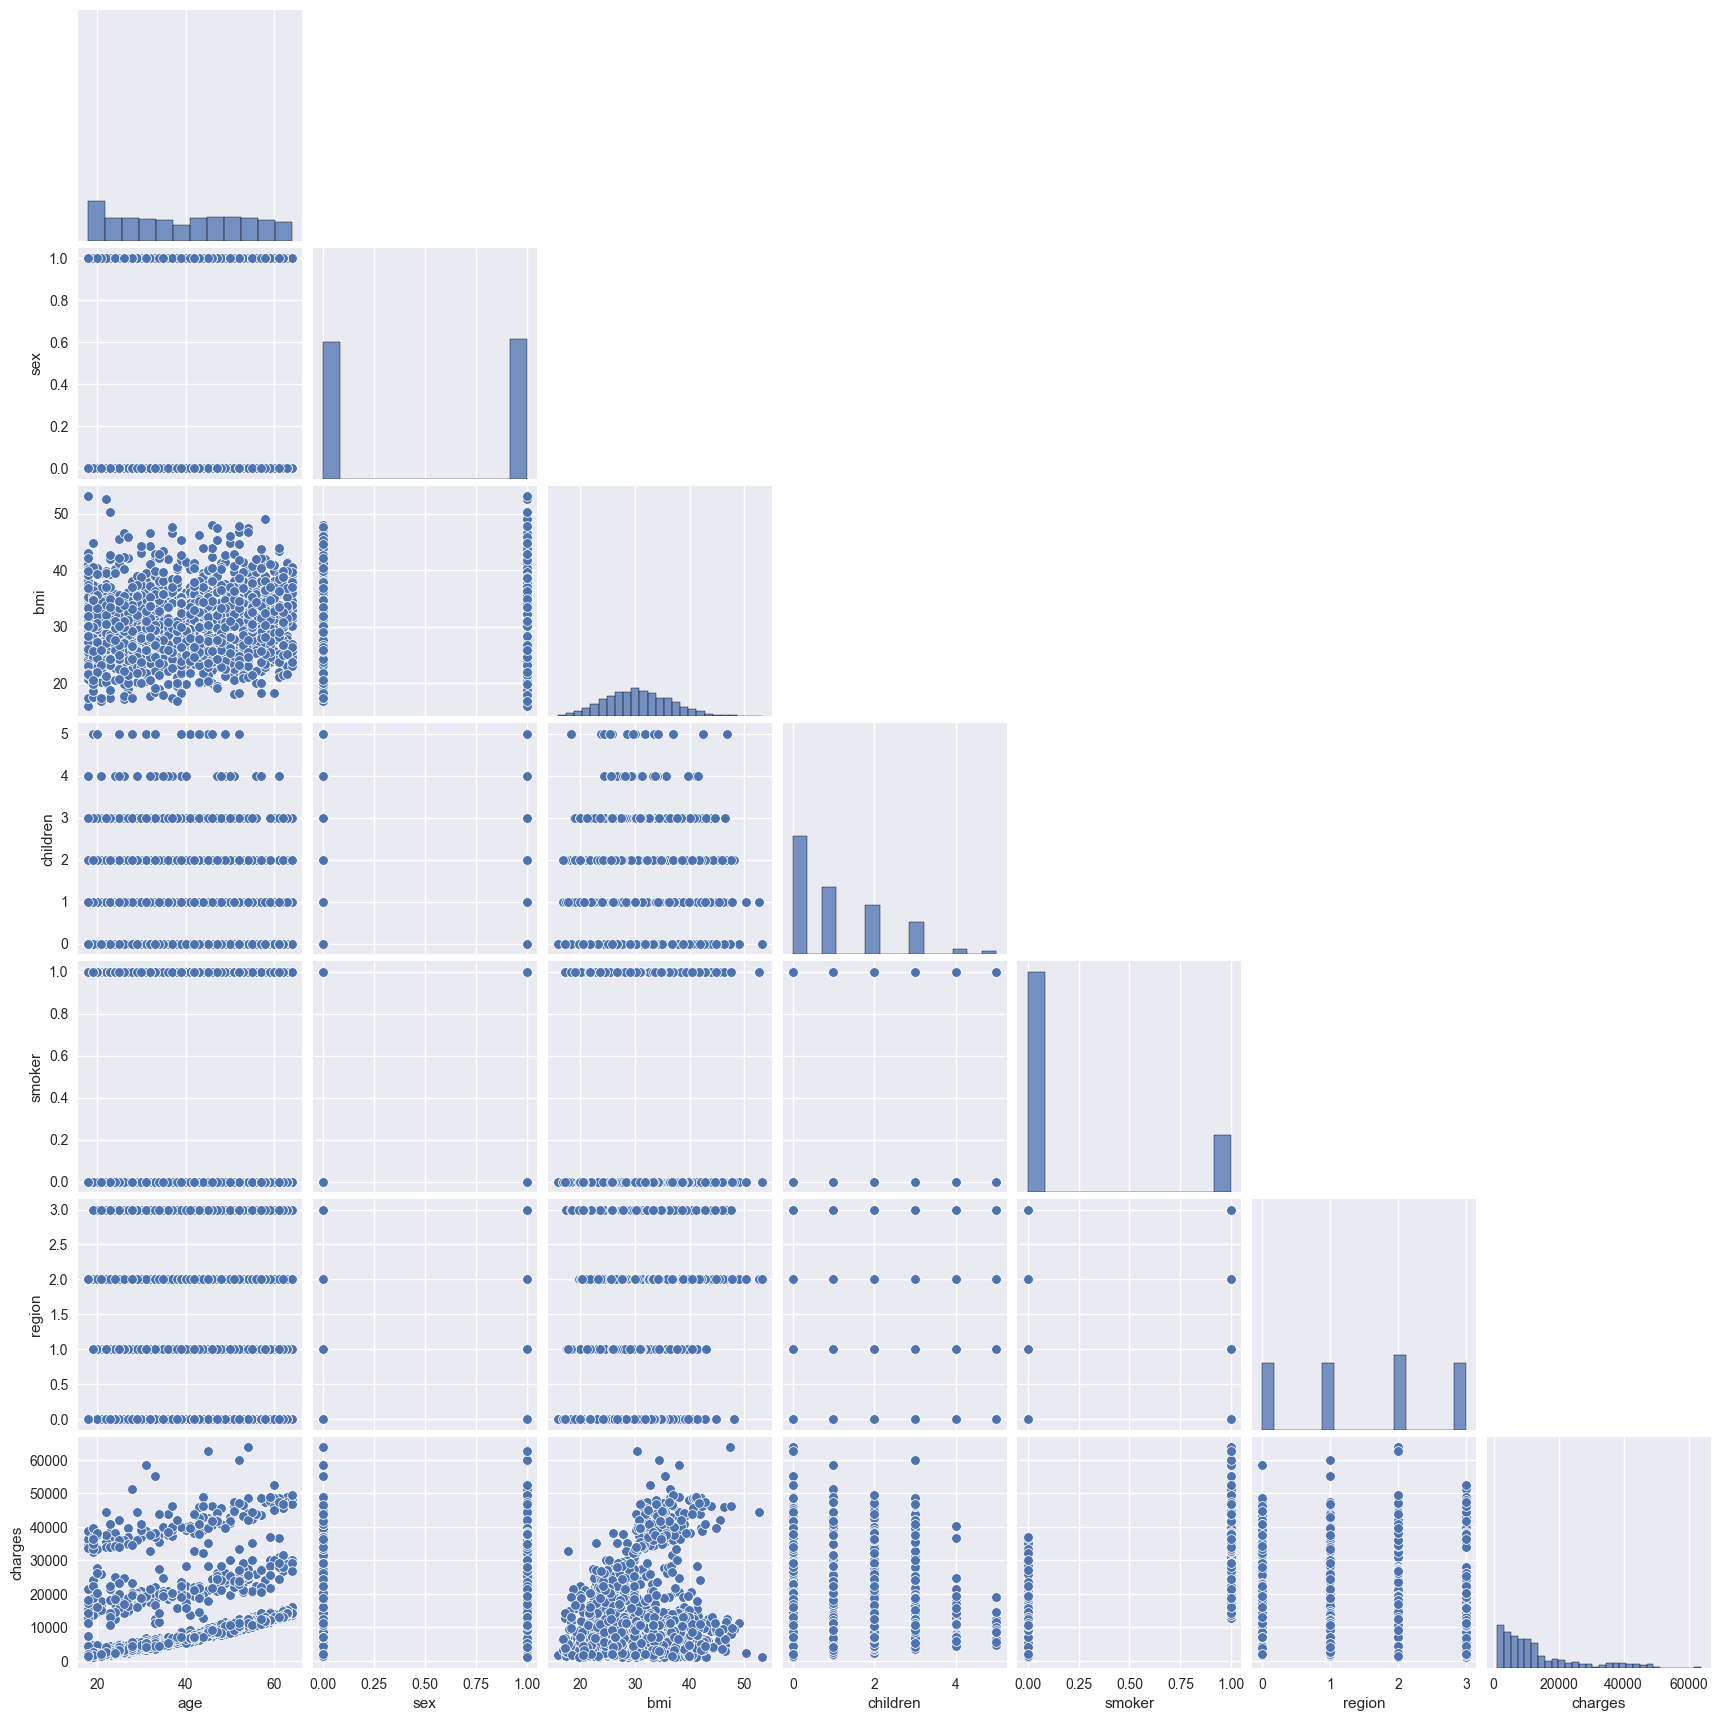

In [146]:
plt.figure(figsize=(10,8))
sns.pairplot(data=df_encode , corner=True)
plt.show()

In [37]:
#Рассмотрим распределение курящих и не курящих людей, относительно медицинских затрат

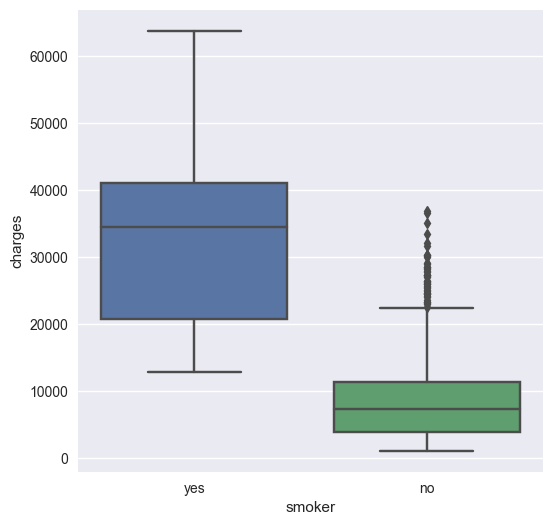

In [133]:
plt.figure(figsize=(6,6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.show()

In [39]:
#Визуально видно что среднии линии не входят в промежутки границ соседних 'усов' графиков, а следовательно эти группы статистически различны между собой.
#Но для наглядности давайте расчитает p-value, что бы отвергнуть нулевую гипотезу о том, что эти группы не имеют статистического различия.

In [40]:
data = df[(np.abs(stats.zscore(df["charges"])) < 3)] 

smoker_yes = data[df['smoker']=='yes']["charges"]
smoker_no = data[df['smoker']=='no']["charges"]

smoker_yes = smoker_yes.values.tolist()
smoker_yes = random.sample(smoker_yes, 100)
smoker_no = smoker_no.values.tolist()
smoker_no = random.sample(smoker_no, 100)

ttest,pval = ttest_ind(smoker_yes,smoker_no,equal_var = False)
print("ttest",ttest)
print('p value',format(pval, '.70f'))

if pval <0.05:
    print("Мы отвергаем нулевую гипотезу")
else:
    print("Мы принимаем нулевую гипотезу")

ttest 16.5264299161301
p value 0.0000000000000000000000000000000000001762557600077180186689706424932357
Мы отвергаем нулевую гипотезу


In [41]:
#p value оказался меньше 0.05 следовательно мы отвергли нулевую гипотезу о том что курящие и не курящие имеют статистически одинаковые затраты на медицинское расходы.
#Медицинские расходы больше в курящей группе.

In [42]:
#Распределение возраста и мед. расходов

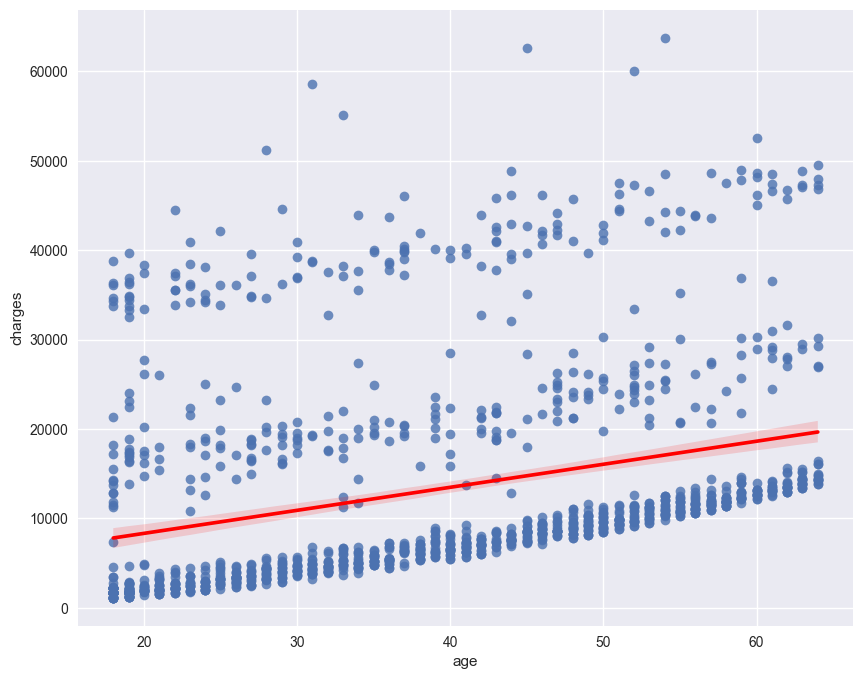

In [126]:
plt.figure(figsize=(10,8))
sns.regplot(x='age', y='charges',data=df, line_kws ={'color':'red'})
plt.show()

In [45]:
#С увеличение возраста мед расходы увеличиваются

In [217]:
#Рассмотрим так же влияние курения на отношение возраста и мед.затрат

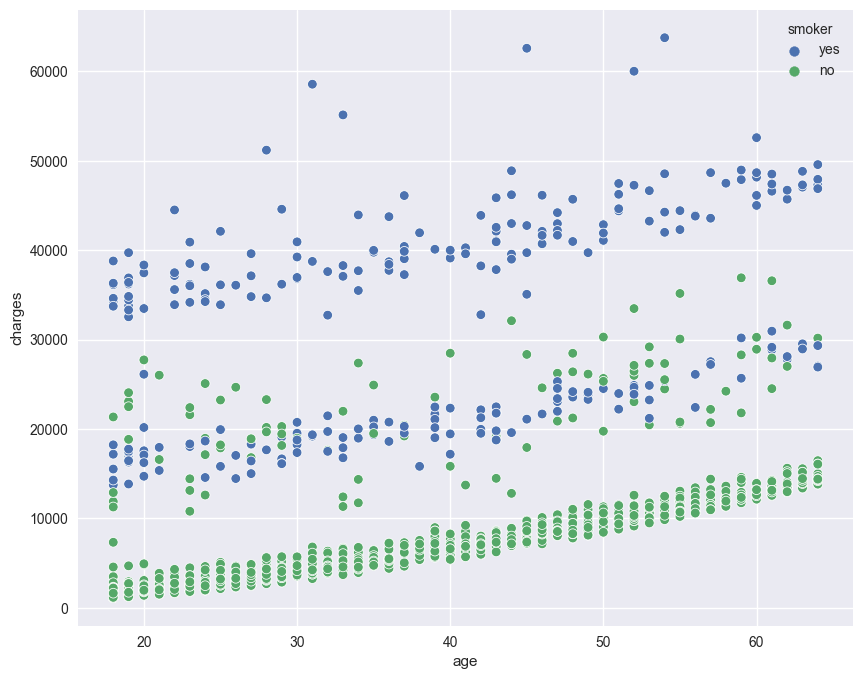

In [47]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='age', y='charges',data=df,hue='smoker')
plt.show()

<Figure size 1000x800 with 0 Axes>

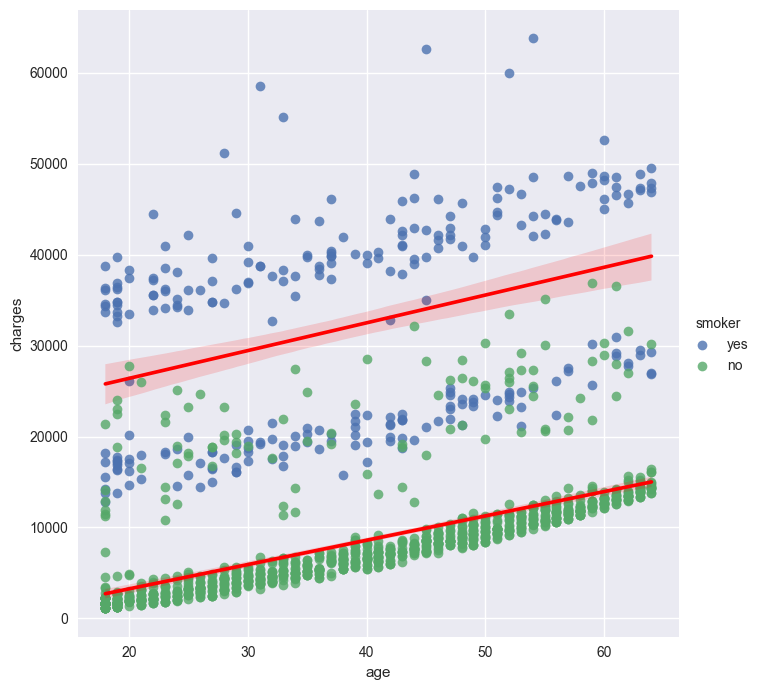

In [48]:
plt.figure(figsize=(10,8))
sns.lmplot(x='age', y='charges',data=df, hue='smoker', line_kws ={'color':'red'},height=7)
plt.show()

In [218]:
#Можно невооруженным взглядом заметить, что не курящие люди в целом трятят на мед.помощь меньше курящих

In [219]:
#Посмотрим на график возраста и затрат относительно ИМТ

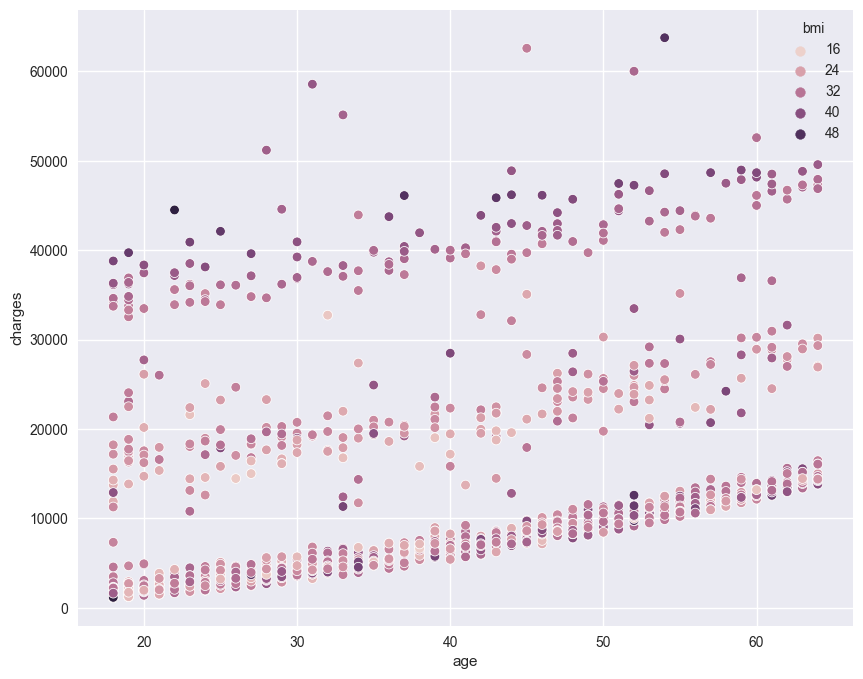

In [51]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='age', y='charges',data=df,hue='bmi')
plt.show()

In [52]:
#Кажется что людей с высоким индексом массы тела больше тратят на мед помощь и больше относятся к группе которая курит, проверим так ли это

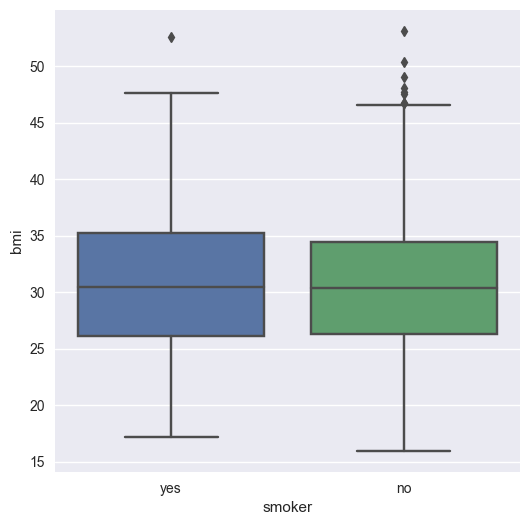

In [134]:
plt.figure(figsize=(6,6))
sns.boxplot(x='smoker', y='bmi', data=df)
plt.show()

In [54]:
#В целом можно сказать что курение не влияет на ИМТ. Но давайте убедимся посчитав p=value

In [55]:
data = df[(np.abs(stats.zscore(df["bmi"])) < 3)] 

smoker_yes = data[df['smoker']=='yes']["bmi"]
smoker_no = data[df['smoker']=='no']["bmi"]

smoker_yes = smoker_yes.values.tolist()
smoker_yes = random.sample(smoker_yes, 100)
smoker_no = smoker_no.values.tolist()
smoker_no = random.sample(smoker_no, 100)

ttest,pval = ttest_ind(smoker_yes,smoker_no,equal_var = False)
print("ttest",ttest)
print('p value',format(pval, '.70f'))

if pval <0.05:
    print("Мы отвергаем нулевую гипотезу")
else:
    print("Мы принимаем нулевую гипотезу")

ttest 0.41992582081670565
p value 0.6749958590097446808897529990645125508308410644531250000000000000000000
Мы принимаем нулевую гипотезу


In [72]:
#p.value больше 0,05 поэтому мы принимаем нулевую гипотезу о том что курение не влияет на ИМТ.

In [220]:
#Посмотрим график распределения ИМТ и затрат

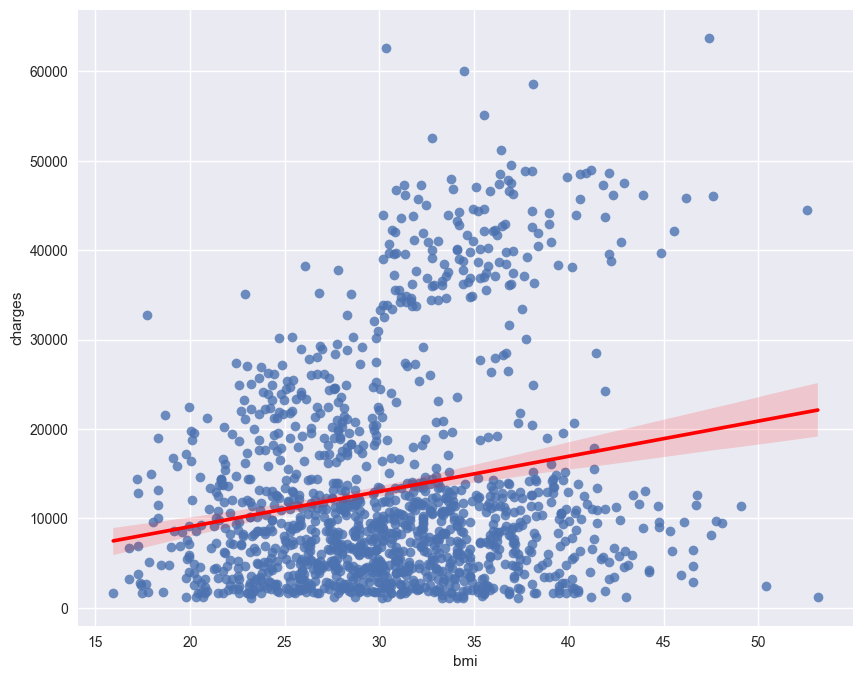

In [178]:
plt.figure(figsize=(10,8))
sns.regplot(x='bmi', y='charges',data=df,line_kws ={'color':'red'} )
plt.show()

In [221]:
#С увеличением ИМТ увеличивается мед.затраты. 

<Figure size 1000x800 with 0 Axes>

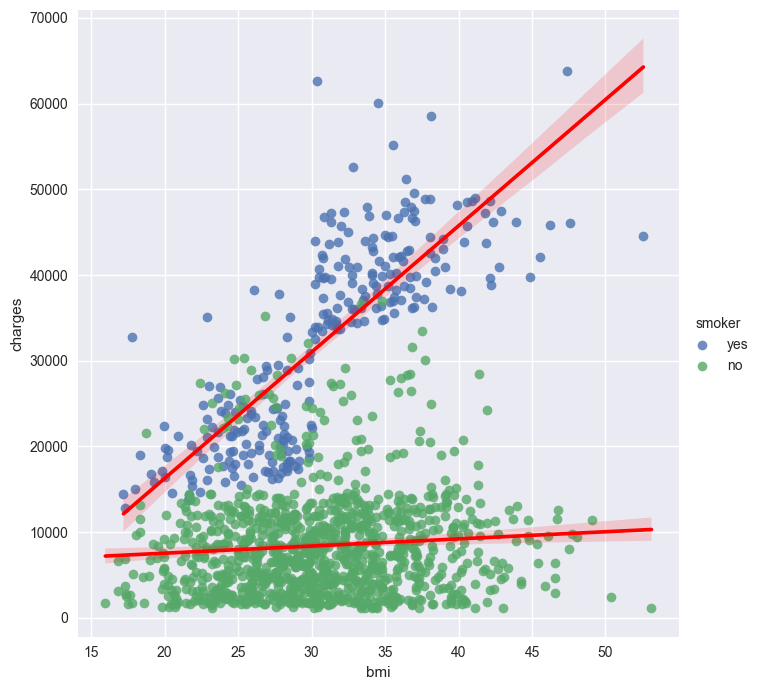

In [60]:
plt.figure(figsize=(10,8))
sns.lmplot(x='bmi', y='charges',data=df, hue='smoker', line_kws ={'color':'red'},height=7)
plt.show()

In [61]:
#Хоть в курящих и не курящих группах ИМТ статистически не различается, можно сказать что курение совместно с увеличенным ИМТ вносит дополнительный вклад в увеличение медицинских затрат.

In [73]:
#Средняя по ИМТ у нас распологается на 30, что является началом первой степени ожирению. разделим нашу выборку на людей до 30 и выше 30 по ИМТ для сравнения этих групп относительно мед.затрат и курения.

In [222]:
df_encode['bmi_30']= np.where(df_encode['bmi']>30, '>30', '<30')
df_encode['smoker']= np.where(df_encode['smoker']==0, 'no', 'yes')
df_encode.head()

,age,sex,bmi,children,smoker,region,charges,bmi_30
0,19,0,27.900,0,yes,3,16884.92400,<30
1,18,1,33.770,1,no,2,1725.55230,>30
2,28,1,33.000,3,no,2,4449.46200,>30
3,33,1,22.705,0,no,1,21984.47061,<30
4,32,1,28.880,0,no,1,3866.85520,<30


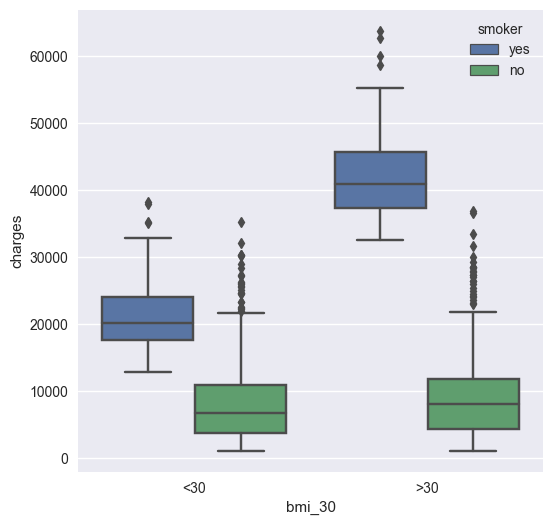

In [85]:
#На данном графике наглядно показано, что курение, совместно и большим ИМТ дополнительно с стимулирует увеличение мед.затрат. 
#Хотя как мы выснили раньше, люди с высоким ИМТ в равной степени распределены в курящих и не курящих группах.
#Давайте докажем это посчитав p-value

In [88]:
data = df_encode[df_encode['smoker']=='yes'][(np.abs(stats.zscore(df_encode["charges"])) < 3)] 

high_bmi = data[df_encode['bmi_30']=='>30']["charges"]
low_bmi = data[df_encode['bmi_30']=='<30']["charges"]

high_bmi = high_bmi.values.tolist()
high_bmi = random.sample(high_bmi, 100)
low_bmi = low_bmi.values.tolist()
low_bmi = random.sample(low_bmi, 100)

ttest,pval = ttest_ind(high_bmi,low_bmi,equal_var = False)
print("ttest",ttest)
print('p value',format(pval, '.70f'))

if pval <0.05:
    print("Мы отвергаем нулевую гипотезу")
else:
    print("Мы принимаем нулевую гипотезу")

ttest 29.435887026483588
p value 0.0000000000000000000000000000000000000000000000000000000000000000000000
Мы отвергаем нулевую гипотезу


In [89]:
data = df_encode[df_encode['smoker']=='no'][(np.abs(stats.zscore(df_encode["charges"])) < 3)] 

high_bmi = data[df_encode['bmi_30']=='>30']["charges"]
low_bmi = data[df_encode['bmi_30']=='<30']["charges"]

high_bmi = high_bmi.values.tolist()
high_bmi = random.sample(high_bmi, 100)
low_bmi = low_bmi.values.tolist()
low_bmi = random.sample(low_bmi, 100)

ttest,pval = ttest_ind(high_bmi,low_bmi,equal_var = False)
print("ttest",ttest)
print('p value',format(pval, '.70f'))

if pval <0.05:
    print("Мы отвергаем нулевую гипотезу")
else:
    print("Мы принимаем нулевую гипотезу")

ttest 0.6125888625942757
p value 0.5408599148312058790821765796863473951816558837890625000000000000000000
Мы принимаем нулевую гипотезу


In [90]:
#в первом подсчете мы отвергли нулевую гипотезу о том что совокупные факторы (курение и ИМТ>30) не оказывает влияние на мед затраты.
#во втором подсчете мы доказали нулевую гипотезу о том что совокупные факторы (не курящие и ИМТ>30) не оказывает влияние на мед затраты.

In [158]:
#Посмотрим графики распределения мед.затрат в редионах, так же оценим влияние курения,повышеного ИМТ. И отношение регионов к ИМТ.

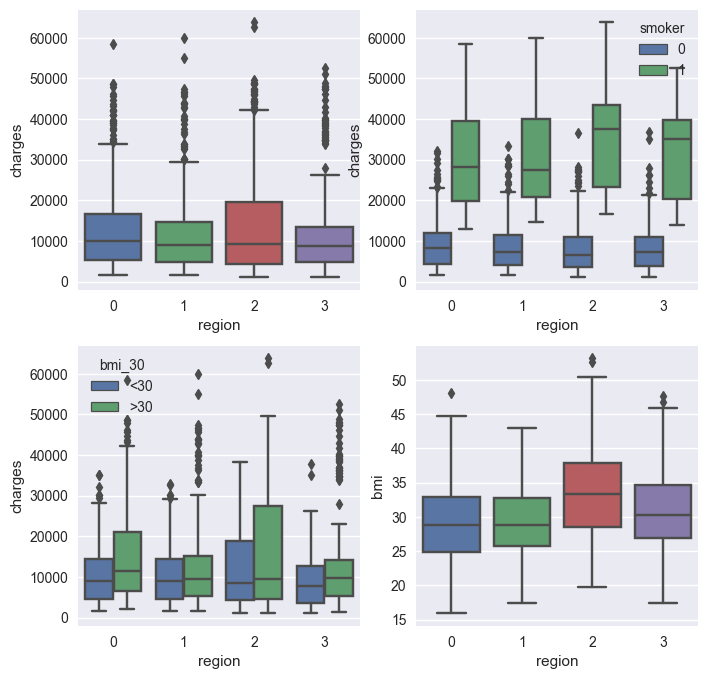

In [159]:
fig,ax =plt.subplots(2,2,figsize=(8, 8))
sns.boxplot(x='region', y='charges', data=df_encode,ax=ax[0,0])
sns.boxplot(x='region', y='charges', data=df_encode,hue='smoker',ax=ax[0,1])
sns.boxplot(x='region', y='charges', data=df_encode,hue='bmi_30',ax=ax[1,0])
sns.boxplot(x='region', y='bmi', data=df_encode,ax=ax[1,1])
plt.show()

In [160]:
#Помими озвученых ранее заономерностей можно заметить, что в регионе 2(southeast) наблюдается увеличеное количество людей с высоким ИМТ.

In [182]:
#Посмотрим графики распределения мед.затрат у людей с разным количеством детей, так же оценим влияние курения,повышеного ИМТ. И отношение количества детей к регионам.

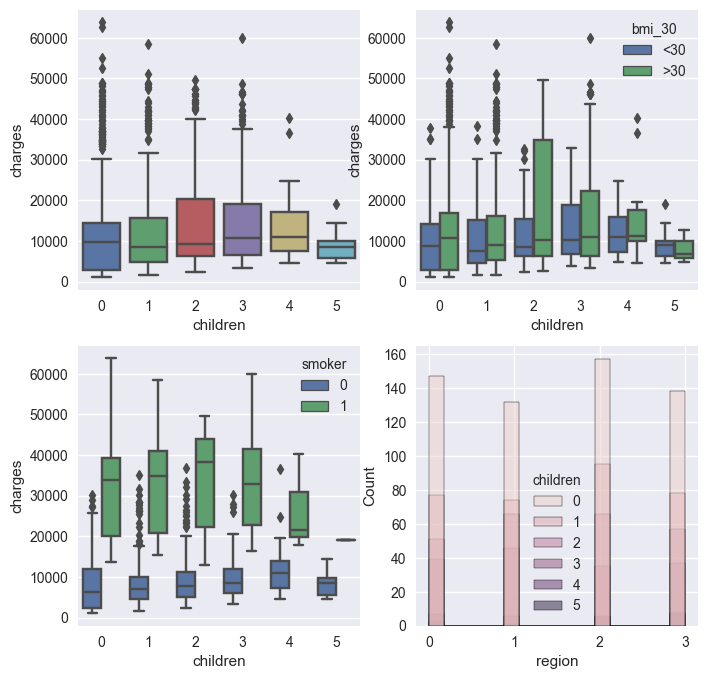

In [185]:
fig,ax =plt.subplots(2,2,figsize=(8, 8))
sns.boxplot(x='children', y='charges', data=df_encode,ax=ax[0,0])
sns.boxplot(x='children', y='charges', data=df_encode, hue='bmi_30',ax=ax[0,1])
sns.boxplot(x='children', y='charges', data=df_encode, hue='smoker',ax=ax[1,0])
sns.histplot(x='region', data=df_encode, hue='children',ax=ax[1,1])
plt.show()

In [ ]:
#Помими озвученых ранее заономерностей можно заметить, что мед затраты мало зависят от количества детей. Но люди с 5 детьми тратят на мед. обслуживание немного меньше среднего, а у людей с двумя детьми и высоким ИМТ большой разброс по затратам.

In [148]:
#Выводы

In [186]:
#Анализирую данный датасет можно утверждать:
#Наибольшая свазь с медицинскими расходамит можно обнаружить с переменной курение, возраста и ИМТ
#А Количество детей, пол, и регион не оказывают сильного влияния на мед. трататы.
#Так же можно отметить что высокий индекс массы тела не связан с курением. Однако курение, совместно с высоким ИМТ оказывают синергическое действие и усиливает положительное влияние на медицинские траты.